In [1]:
#Developing model to predicting stock market indices (Sensex).
#were we will perform 5 major step of analysis:
    #1. Loading data.
    #2. Clean/manipulate data.
    #3. prepare the data for modeling.
    #4. Modelin.
    #5. Analyse the data.

In [2]:
#As we taking stock market data, so we have output as continous numeric
#thus we will use Regression Algorithms 

In [3]:
#importing basic library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading the dataset
df=pd.read_csv("sensex_data.csv")

In [5]:
#first look at data 
df.head()

,Date,Open,High,Low,Close
0,22-Nov-17,33569.07,33654.53,33465.23,33561.55
1,23-Nov-17,33575.91,33670.19,33468.30,33588.08
2,24-Nov-17,33670.00,33738.53,33639.98,33679.24
3,27-Nov-17,33640.51,33745.17,33540.46,33724.44
4,28-Nov-17,33726.65,33770.15,33576.65,33618.59


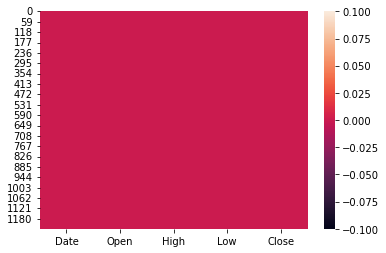

In [6]:
#checking null values with visualization
sb.heatmap(df.isnull())
plt.show()

In [7]:
df.isnull().sum()
#here we can see thier is no null values present in data

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [8]:
#checking duplicate values
df.duplicated().sum()

0

<AxesSubplot:xlabel='Close'>

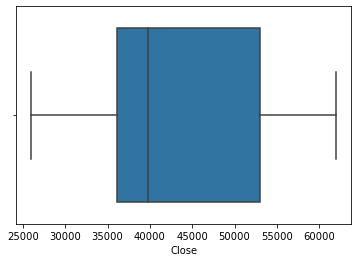

In [9]:
#checking for outlier 
sb.boxplot(data=df,x='Close')

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
#coverting data type of date from object to datetime
df['Date']=pd.to_datetime(df['Date'])

<AxesSubplot:xlabel='Close', ylabel='Count'>

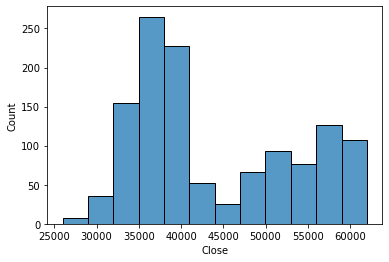

In [12]:
#visualizing df['Close'] records to see distribution of data
sb.histplot(data=df,x='Close')

In [13]:
df.describe().style.background_gradient()

,Open,High,Low,Close
count,1237.000000,1237.000000,1237.000000,1237.000000
mean,44081.375327,44308.526467,43757.179086,44033.667922
std,9572.969201,9609.033775,9540.802564,9585.148042
min,26499.810000,27462.870000,25638.900000,25981.240000
25%,36181.370000,36285.460000,35926.940000,36093.470000
50%,39806.860000,39979.480000,39499.190000,39749.730000
75%,53065.690000,53301.400000,52751.760000,53018.940000
max,62156.480000,62245.430000,61708.630000,61980.720000


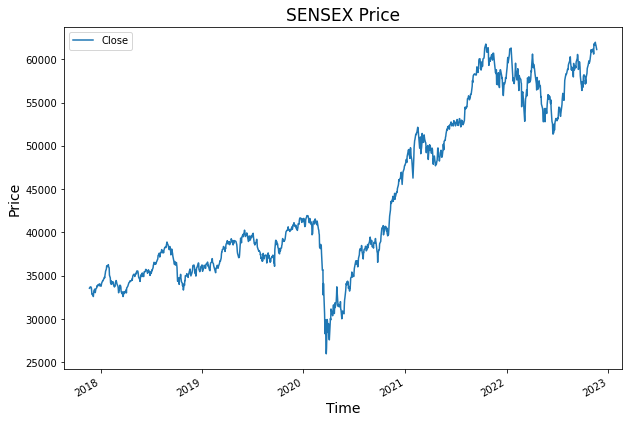

In [14]:
#ploting time series chart 
df.plot(figsize=(10, 7),x='Date',y='Close',kind='line')
plt.title("SENSEX Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
#plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [15]:
#selecting input(faeture) and output(target)
X=df.drop('Close',axis=1) #input
Y=df['Close']   #output

In [16]:
X.columns

Index(['Date', 'Open', 'High', 'Low'], dtype='object')

In [17]:
#preparing data for train test split
def traintestsplit(data):
    data_len=data.shape[0]
    train_split = int(data_len * 0.7)
    print('Train_split: ',train_split)
    test_split = data_len - train_split
    print('Test_split: ',test_split)
    
    X_train = X[:train_split]
    X_test = X[train_split:]
    
    Y_train = Y[:train_split]
    Y_test = Y[train_split:]
    return X_train,X_test,Y_train,Y_test

In [18]:
#calling the function
X_train,X_test,Y_train,Y_test = traintestsplit(df)

Train_split:  865
Test_split:  372


In [19]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((865, 4), (372, 4), (865,), (372,))

In [20]:
#applying standardScaler to make value in one unit 
from sklearn.preprocessing import StandardScaler

#creating object of StandardScaler class
ss=StandardScaler()

X_train = ss.fit_transform(X_train[['Open','High','Low']])
X_test = ss.transform(X_test[['Open','High','Low']])

In [21]:
#performing model with linear regression algorithm
from sklearn.linear_model import LinearRegression

In [22]:
#creating object of LinearRegresion class
lr=LinearRegression()

In [23]:
#training model with 70% data using linear regression
lr.fit(X_train,Y_train)

LinearRegression()

In [24]:
#checking slope
s=lr.coef_
print(s)

[-3787.62199858  4828.73041444  3976.97524787]


In [25]:
#checking intercept
i=lr.intercept_
print(i)

38481.45927167631


In [26]:
#testing model with 30% data
Y_pred = lr.predict(X_test)

In [27]:
#creating new data frame to compare actual value VS predicted value
dict={'Actual':Y_test,'Predict':Y_pred}
df_new = pd.DataFrame(dict)
df_new.sample(10)

,Actual,Predict
973,59984.70,60089.067406
1068,56816.65,56750.526507
1158,55268.49,55364.727227
1082,59610.41,59734.305702
887,52699.00,52739.851568
1194,59141.23,59089.383601
971,61350.26,61357.805431
1076,57943.65,57891.073476
1140,53018.94,53373.182991
946,58490.93,59024.273594


In [28]:
#Evaluating model
from sklearn.metrics import mean_squared_error,r2_score

In [29]:
#finding mean squared error 
mse=mean_squared_error(Y_test,Y_pred)
print("MSE: ",mse)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

MSE:  32698.826740300603
RMSE:  180.82816910067027


In [30]:
#checking accuracy using r2_score
r2_score(Y_test,Y_pred)

0.9960643869925654

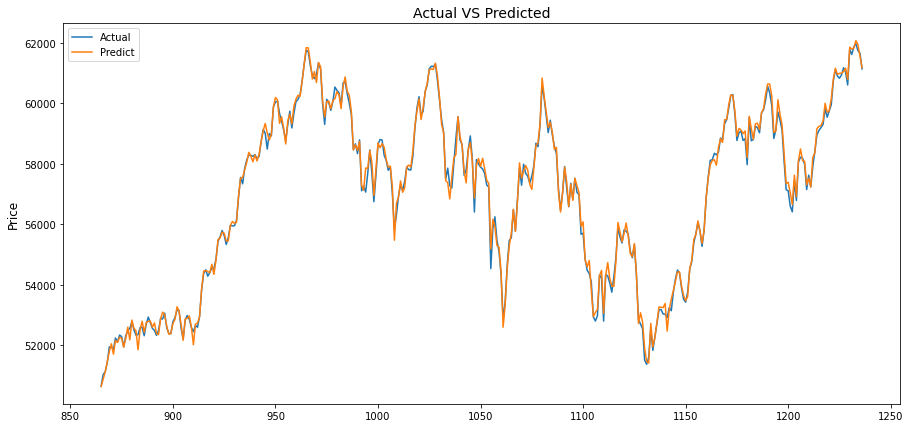

In [38]:
#visualizing Actual data VS predicted data
df_new.plot(figsize=(15,7))
plt.title("Actual VS Predicted",fontsize=14)
plt.ylabel("Price",fontsize=12)
plt.show()